In [168]:
from qiskit import __version__
print(__version__)

1.4.2


In [169]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator, Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Input states

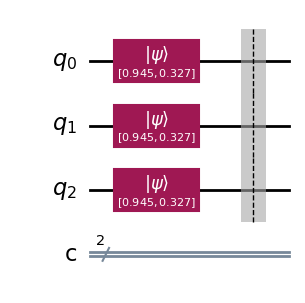

In [170]:
circuit = QuantumCircuit(3, 2)

theta = np.arctan(np.sqrt((np.sqrt(5) - 1) / 2))
amp_0 = np.cos(theta/2)
amp_1 = np.sin(theta/2)

for i in range(3):
    circuit.initialize([amp_0, amp_1], i)

circuit.barrier() 

display(circuit.draw(output='mpl'))

# Applying the Logical Operators

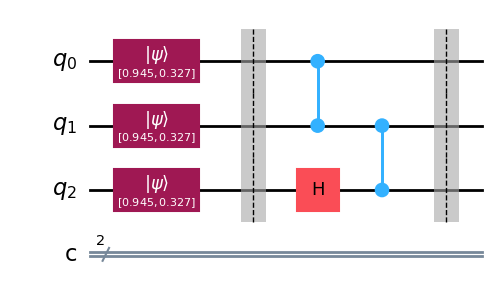

In [171]:
circuit.h(2)
circuit.cz(0, 1)
circuit.cz(1, 2)
circuit.barrier()

display(circuit.draw(output='mpl'))

# Before Measurement

In [172]:
circuit.h(0)
circuit.h(1)
state_before_measurement = Statevector.from_instruction(circuit)
print(state_before_measurement)
display(state_before_measurement.draw("latex"))

Statevector([0.63149988+0.j, 0.44972686+0.j, 0.44972686+0.j,
             0.07560691+0.j, 0.21850801+0.j, 0.036735  +0.j,
             0.30682575+0.j, 0.21850801+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

# After Measurement

In [173]:
res, collapsed = state_before_measurement.measure([0, 1])
print("Measured: ", res)
print(collapsed)
display(collapsed.draw("latex"))

Measured:  00
Statevector([0.94502682+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.32699283+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

In [174]:
amp0 = collapsed.data[0]
amp1 = collapsed.data[4]
output = Statevector([amp0, amp1])
display(output.draw("latex"))

<IPython.core.display.Latex object>

# Checking the probabilities of measurement outcomes

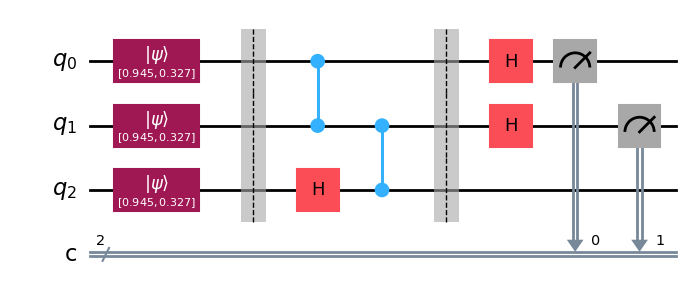

Result(backend_name='aer_simulator_statevector', backend_version='0.14.2', qobj_id='', job_id='3f08d0ac-3537-48cc-9364-2bca9424dbe7', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 223, '0x3': 41, '0x0': 441, '0x2': 295}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=3, name='circuit-173', qreg_sizes=[['q', 3]], metadata={}), status=DONE, seed_simulator=65494427, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 1, 'parallel_shots': 12, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'time_taken': 0.005379316, 'measure_sampling': False, 'num_clbits': 2, 'max_memory_mb': 32768, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'num_qubits': 3, 'method': 'statevector', 'required_memory_mb': 1, 'fusion': {'enabled': True, 'threshold': 14, 'applied': F

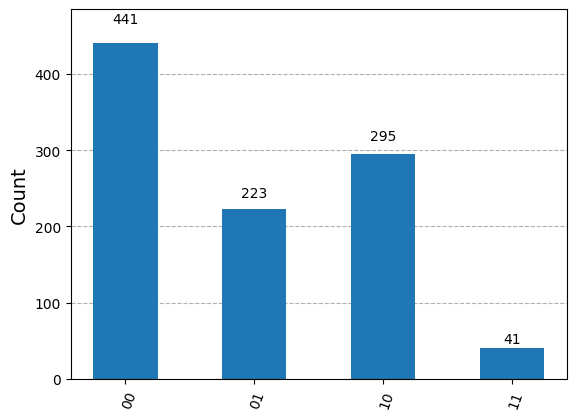

In [30]:
backend = AerSimulator(method='statevector')

circuit.measure(0, 0)
circuit.measure(1, 1)
display(circuit.draw(output='mpl'))
job = backend.run(circuit,shots=1000)
result = job.result()
print(result)

counts = result.get_counts(circuit)
print(counts)
display(plot_histogram(counts)) 

# Actual Results

In [175]:
num_qubits = collapsed.num_qubits  # 3
for i, amp in enumerate(collapsed.data):
    prob = np.abs(amp)**2
    bitstring = format(i, f'0{num_qubits}b')  # dynamically formats to 3 bits
    print(f"|{bitstring}⟩: {prob:.4f}")

|000⟩: 0.8931
|001⟩: 0.0000
|010⟩: 0.0000
|011⟩: 0.0000
|100⟩: 0.1069
|101⟩: 0.0000
|110⟩: 0.0000
|111⟩: 0.0000


# Comparing the output state to ideal state

In [32]:
theta = np.arctan(np.sqrt((np.sqrt(5) - 1) / 2))
amp_0 = np.cos(theta/2)
amp_1 = np.sin(theta/2)
ideal = Statevector([amp_0, amp_1])

display(ideal.draw("latex"))

prob_0 = np.abs(amp_0)**2
prob_1 = np.abs(amp_1)**2

print(f"Probability of measuring 0: {prob_0:.4f}")
print(f"Probability of measuring 1: {prob_1:.4f}")

<IPython.core.display.Latex object>

Probability of measuring 0: 0.8931
Probability of measuring 1: 0.1069
